# MURA

## Categorical classification of X-ray hand images using convolutional neural networks implemented with Keras

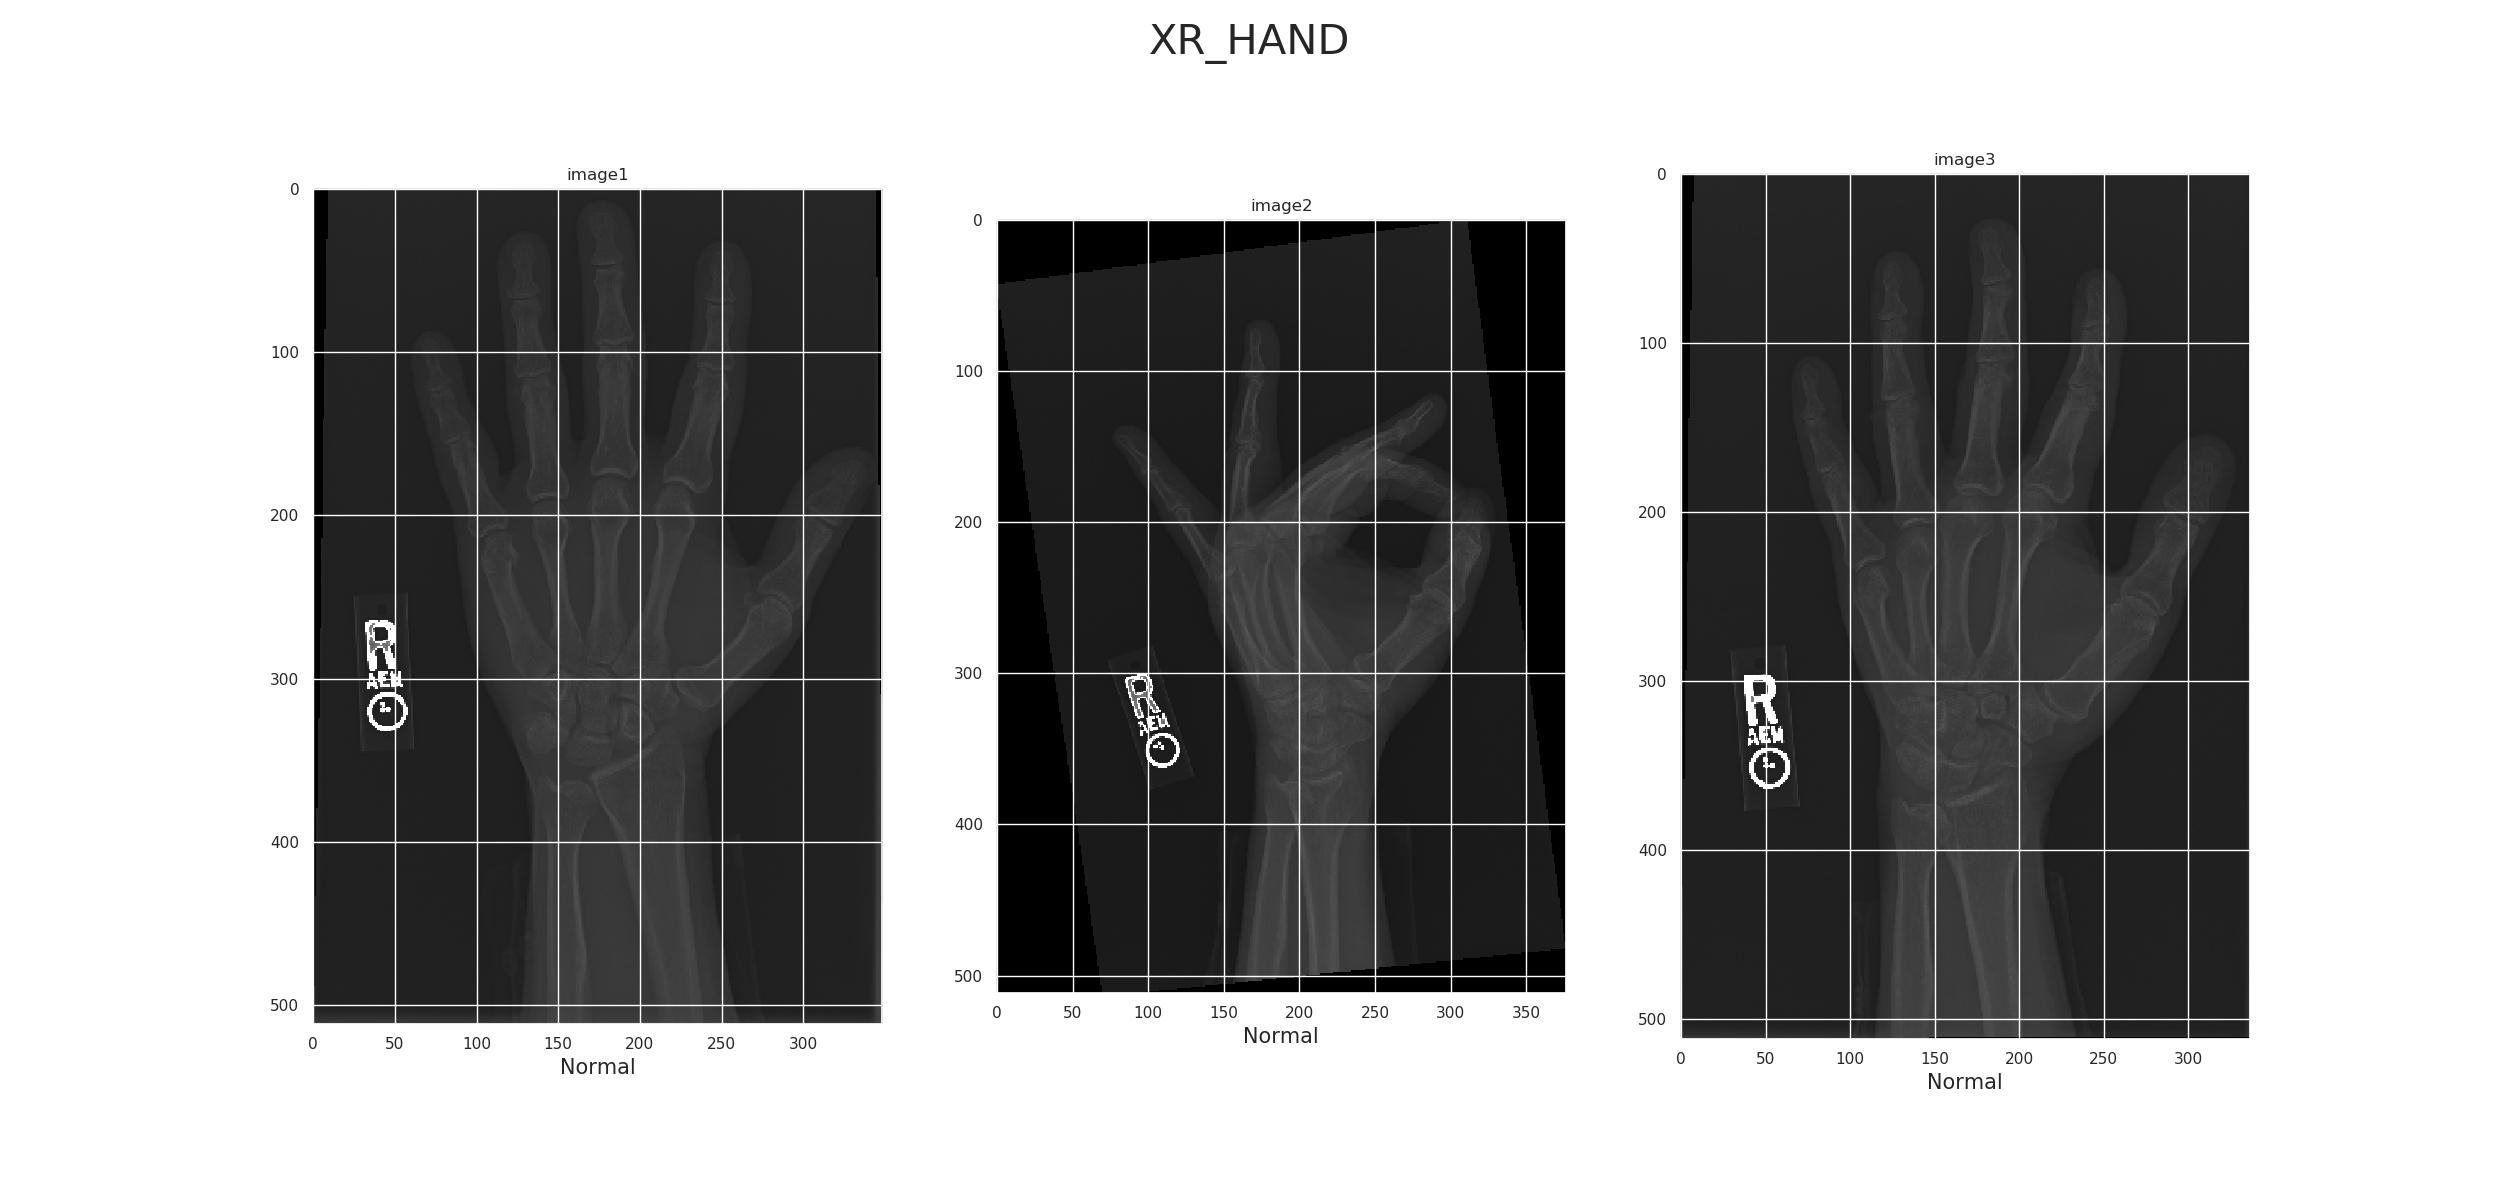

In [6]:
from IPython.display import Image
Image("img/1.png")

## 1. Import libraries

In [22]:
# General purpose libraries
import os
import shutil
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
# Keras libraries
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras import optimizers

## 2. Folder manipulation

### Copy hand data 

In [24]:
main_folder_path = "/home/michal/Pulpit/MURA/MURA-v1.1"
os.chdir(main_folder_path) # Go to main directory

from modules import models, my_utils, plots

#Mura hand pathes
dataset_train_hand_path = '/home/michal/Pobrane/MURA-v1.1/train/XR_HAND' 
dataset_valid_hand_path = '/home/michal/Pobrane/MURA-v1.1/valid/XR_HAND'  

#Copy data from dataset to separate folders
my_utils.copy_folder(dataset_train_hand_path,os.path.join(main_folder_path,"train/XR_HAND"))
my_utils.copy_folder(dataset_valid_hand_path,os.path.join(main_folder_path,"valid/XR_HAND"))

### Create train and test folders

In [25]:
# Data work folder
hand_path = os.path.join(main_folder_path,"hand")
my_utils.create_folder(hand_path)

# Train
hand_train = os.path.join(hand_path,"train")
my_utils.create_folder(hand_train)

hand_train_normal = os.path.join(hand_train,"normal")
my_utils.create_folder(hand_train_normal)

hand_train_abnormal = os.path.join(hand_train,"abnormal")
my_utils.create_folder(hand_train_abnormal)

# Valid
hand_valid = os.path.join(hand_path,"valid")
my_utils.create_folder(hand_valid)
    
hand_valid_normal = os.path.join(hand_valid,"normal")
my_utils.create_folder(hand_valid_normal)
    
hand_valid_abnormal = os.path.join(hand_valid,"abnormal")
my_utils.create_folder(hand_valid_abnormal)

## 3. Preprocessing

In [26]:
# Open CVS files

main_structure = my_utils.get_main_f(os.listdir())
os.chdir(main_structure[4])
csv_structure = my_utils.read_csv(os.listdir())
path_train,path_valid,label_valid,label_train = my_utils.read_csv(os.listdir())
os.chdir(main_folder_path)

['/home/michal/Pulpit/MURA/MURA-v1.1/main.py']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/Pulpit/MURA/MURA-v1.1/img']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/Pulpit/MURA/MURA-v1.1/img', '/home/michal/Pulpit/MURA/MURA-v1.1/valid']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/Pulpit/MURA/MURA-v1.1/img', '/home/michal/Pulpit/MURA/MURA-v1.1/valid', '/home/michal/Pulpit/MURA/MURA-v1.1/modules']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/Pulpit/MURA/MURA-v1.1/img', '/home/michal/Pulpit/MURA/MURA-v1.1/valid', '/home/michal/Pulpit/MURA/MURA-v1.1/modules', '/home/michal/Pulpit/MURA/MURA-v1.1/CSV']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/Pulpit/MURA/MURA-v1.1/img', '/home/michal/Pulpit/MURA/MURA-v1.1/valid', '/home/michal/Pulpit/MURA/MURA-v1.1/modules', '/home/michal/Pulpit/MURA/MURA-v1.1/CSV', '/home/michal/Pulpit/MURA/MURA-v1.1/MURA.ipynb']
['/home/michal/Pulpit/MURA/MURA-v1.1/main.py', '/home/michal/

### GET HAND XRAY

In [27]:
#Change columns name
path_train = path_train.rename(columns = {'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png':'img'})
path_valid = path_valid.rename(columns = {'MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image1.png':'img'})

# Use function and get only HAND directories
path_train = my_utils.get_selected_feature(path_train,"MURA-v1.1/train/XR_HAND")
path_valid = my_utils.get_selected_feature(path_valid,"MURA-v1.1/valid/XR_HAND")

# Get radiologist predictions
label_train = label_train.rename(columns = {"MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/":'img'})
label_valid = label_valid.rename(columns = {'MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/':'img'})

label_train = my_utils.get_selected_feature(label_train,"XR_HAND")
label_valid = my_utils.get_selected_feature(label_valid,"XR_HAND")

# Get normal/abnormal distribution
distr_hand_train = my_utils.get_data_distribution(path_train)
distr_hand_valid = my_utils.get_data_distribution(path_valid)


# Data separation

# 1.Rename pathes
path_train = my_utils.re_path(path_train)
path_valid = my_utils.re_path(path_valid)

# 2. Separate images to folder classes

os.path.exists("/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient00008/study1_positive")
os.path.exists("/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient00008/study1_positive")

my_utils.separate_images(path_train,hand_train_abnormal,hand_train_normal)
my_utils.separate_images(path_valid,hand_valid_abnormal,hand_valid_normal)

/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09734/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09734/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09734/study1_positive/image3.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09735/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09735/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09735/study1_positive/image3.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient07365/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient07365/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient07365/study1_positive/image3.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09736/study1_positive/image1.png
positive
/home/michal/Pulpit/

positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient03507/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient03507/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient03507/study1_positive/image3.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09869/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09869/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09869/study1_positive/image3.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09870/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09870/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient04271/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient04271/study1_positive/image2.png
positive
/home/micha

positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09997/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09997/study1_positive/image3.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09998/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09998/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09998/study1_positive/image3.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09999/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09999/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09999/study1_positive/image3.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10000/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10000/study1_positive/image2.png
positive
/home/micha

negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10138/study1_negative/image4.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10139/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10139/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10139/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10140/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10140/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10140/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10141/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10141/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10141/study1_negative/image3.png
negative
/home/micha

negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10266/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10266/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10266/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient03653/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient03653/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient01726/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient01726/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient01726/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10267/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10267/study1_negative/image2.png
negative
/home/micha

negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09302/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient09302/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient04442/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient04442/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient04442/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10401/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10401/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10401/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10402/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10402/study1_negative/image2.png
negative
/home/micha

negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10531/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10531/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10532/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10532/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10532/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient02278/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient02278/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient02278/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10533/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10533/study1_negative/image2.png
negative
/home/micha

negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10667/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10668/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10668/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10668/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10669/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10669/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10670/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10670/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10670/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10671/study1_negative/image1.png
negative
/home/micha

negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10791/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10791/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10791/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10791/study1_negative/image4.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10792/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10792/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10792/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10792/study1_negative/image4.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10793/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10793/study1_negative/image2.png
negative
/home/micha

negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10931/study1_negative/image4.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10932/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10932/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10932/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient01967/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient01967/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10933/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10933/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10933/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient10934/study1_negative/image1.png
negative
/home/micha

negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient11058/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient11059/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient11059/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient11059/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient11060/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient11060/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient11060/study1_negative/image3.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient11061/study1_negative/image1.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient11061/study1_negative/image2.png
negative
/home/michal/Pulpit/MURA/MURA-v1.1/train/XR_HAND/patient11061/study1_negative/image3.png
negative
/home/micha

positive
/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11507/study1_positive/image3.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11507/study1_positive/image4.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11508/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11508/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11509/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11509/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11509/study1_positive/image3.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11247/study1_positive/image1.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11247/study1_positive/image2.png
positive
/home/michal/Pulpit/MURA/MURA-v1.1/valid/XR_HAND/patient11247/study1_positive/image3.png
positive
/home/micha

## 4. Data Overview

In [28]:
print("\nSummary of hand images : ")
print("\nTrain images : ",len(path_train))
print("Valid images : ",len(path_valid))
print("\n2. Hand images overview : \n")
print("Train abnormal img : ",len(os.listdir(hand_train_abnormal)))
print("Train normal img : ",len(os.listdir(hand_train_normal)))
print("Valid abnormal img : ",len(os.listdir(hand_valid_abnormal)))
print("Valid normal img : ",len(os.listdir(hand_valid_normal)))


Summary of hand images : 

Train images :  5543
Valid images :  460

2. Hand images overview : 

Train abnormal img :  1484
Train normal img :  4059
Valid abnormal img :  189
Valid normal img :  271


## 5. Training 

### Test batch size on VGG16 model

In [ ]:
test_models_by_batch = {}
batch_sizes = [2,4,8,16,32,64,128]

for i in batch_sizes:
    
    train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    hand_train,
    # All images will be resized to 150x150
    target_size=(150, 150),
    batch_size=i,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')
    
    validation_generator = test_datagen.flow_from_directory(
    hand_valid,
    target_size=(150, 150),
    batch_size=i,
    class_mode='binary')
    
    test_models_by_batch[str(i)] = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

for i in batch_sizes:
    x = test_models_by_batch[str(i)]
    x = x.history["val_acc"]
    plt.plot(x,label ="Batch: " + str( i))
    plt.legend()
    plt.title("Batch size metrics comparison",fontsize = 26)
    plt.ylabel("val_acc")
    plt.xlabel("epochs")
    
for i in batch_sizes:
    x = test_models_by_batch[str(i)]
    x = x.history["acc"]
    plt.plot(x,label ="Batch: " + str( i))
    plt.legend()
    plt.title("Batch size metrics comparison",fontsize = 26)
    plt.ylabel("acc")
    plt.xlabel("epochs")

### Update Generator settings

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        hand_train,
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        hand_valid,
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary')

### VGG16 model 

In [19]:
models_stack = {}
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(200, 200, 3))

model = models.get_pre_VGG16(conv_base)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5), # 
              metrics=['acc'])

model.summary()

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,epochs=40,
                              validation_data=validation_generator,
                              validation_steps=50,verbose=2)

models_stack["VGG16"] = models.test_model(model,test_datagen,hand_valid)

InternalError: Failed to create session.

### VGG16 fine tuning

In [20]:
model = models.fine_tuning(model,conv_base,'block5_conv1')
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

model.summary()
history1 = model.fit_generator(train_generator,
                               steps_per_epoch=100,
                               epochs=10,
                               validation_data=validation_generator,
                               validation_steps=50)

models_stack["VGG16_fine_tune"] = models.test_model(model,test_datagen,hand_valid)

NameError: name 'model' is not defined

### Resnet50 

In [ ]:
from keras.applications import ResNet50

res_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(200, 200, 3))

resnet = models.get_pre_Resnet50(res_base)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), # 
              metrics=['acc'])

resnet.summary()

history2 = model.fit_generator(train_generator,
                              steps_per_epoch=100,epochs=125,
                              validation_data=validation_generator,
                              validation_steps=50,verbose=2)

models_stack["Resnet"] = models.test_model(model,test_datagen,hand_valid)